In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Import cleaned dataset

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_CLEANEDandEDAandoutlierremoved.csv')


# Encoding Not fire as 0 and Fire as 1

In [3]:
df['Classes']= np.where(df['Classes']== 'not fire', 0,1)

# Temperature
This column can be considered for Regression problem

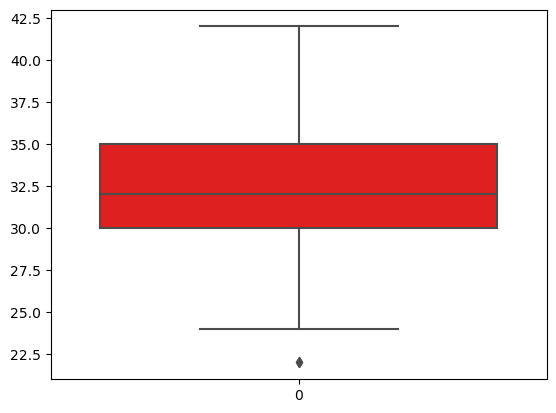

In [4]:
#Boxplot
ax = sns.boxplot(df['Temperature'], color= 'red')

# Dividing the data to X and y

In [5]:
X = df.drop(['Temperature','Classes'],axis=1)
y= df['Temperature']

# Train_Test_Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((183, 10), (61, 10))

In [7]:
X_train.corr()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
RH,1.000000,0.153318,0.227900,-0.614912,-0.482129,-0.251331,-0.708680,-0.423459,-0.576180,-0.458785
Ws,0.153318,1.000000,0.032386,-0.118217,0.008870,0.067541,0.092044,0.035250,0.123338,-0.118954
Rain,0.227900,0.032386,1.000000,-0.743535,-0.574012,-0.663899,-0.567049,-0.603020,-0.558638,-0.040641
FFMC,-0.614912,-0.118217,-0.743535,1.000000,0.812657,0.717242,0.759449,0.803695,0.722781,0.236851
DMC,-0.482129,0.008870,-0.574012,0.812657,1.000000,0.871732,0.723405,0.988868,0.831488,0.216818
DC,-0.251331,0.067541,-0.663899,0.717242,0.871732,1.000000,0.598578,0.929982,0.748827,-0.062938
ISI,-0.708680,0.092044,-0.567049,0.759449,0.723405,0.598578,1.000000,0.697138,0.929777,0.296095
BUI,-0.423459,0.035250,-0.603020,0.803695,0.988868,0.929982,0.697138,1.000000,0.822581,0.130812
FWI,-0.576180,0.123338,-0.558638,0.722781,0.831488,0.748827,0.929777,0.822581,1.000000,0.207600
Region,-0.458785,-0.118954,-0.040641,0.236851,0.216818,-0.062938,0.296095,0.130812,0.207600,1.000000


# Checking multicollinearlity and remove highly corrrelated features

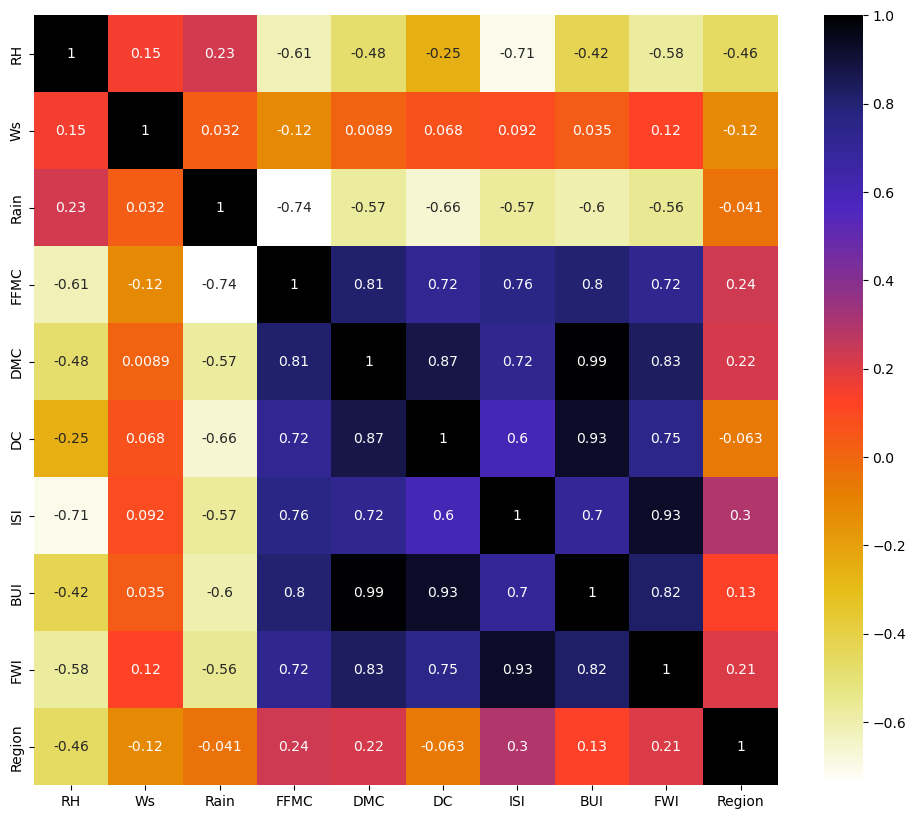

In [8]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [9]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

# Features which has correlation more than 0.95

In [10]:
corr_features = correlation(X_train, 0.95)
corr_features

{'BUI'}

In [11]:
X_train

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
171,1.707570,1.230449,0.00,1.958564,1.527630,1.857332,9.50,1.526339,17.3000,2
89,1.690196,1.278754,0.00,1.959518,1.741939,2.345178,12.50,1.835056,27.3875,1
157,1.633468,1.204120,0.30,1.932981,1.217484,1.663701,4.30,1.247973,6.3000,2
219,1.857332,1.176091,1.25,1.816241,0.633468,1.004321,1.00,0.653213,0.4000,2
234,1.544068,1.255273,0.00,1.969416,1.390935,1.992554,13.80,1.482874,21.6000,2
...,...,...,...,...,...,...,...,...,...,...
67,1.845098,1.230449,0.00,1.942008,1.217484,1.695482,5.50,1.260071,8.0000,1
192,1.602060,1.204120,0.20,1.955688,1.225309,1.561101,8.20,1.225309,10.7000,2
117,1.740363,1.079181,0.00,1.919078,0.845098,1.238046,2.50,0.857332,1.7000,1
47,1.838849,1.176091,0.00,1.936514,1.117271,1.644439,4.60,1.181844,6.0000,1


In [12]:
# drop features which has correlation more than 0.95
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((183, 9), (61, 9))

# Feature scaling Applying Standardization

In [13]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [14]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

Text(0.5, 1.0, 'X_train After Scaling')

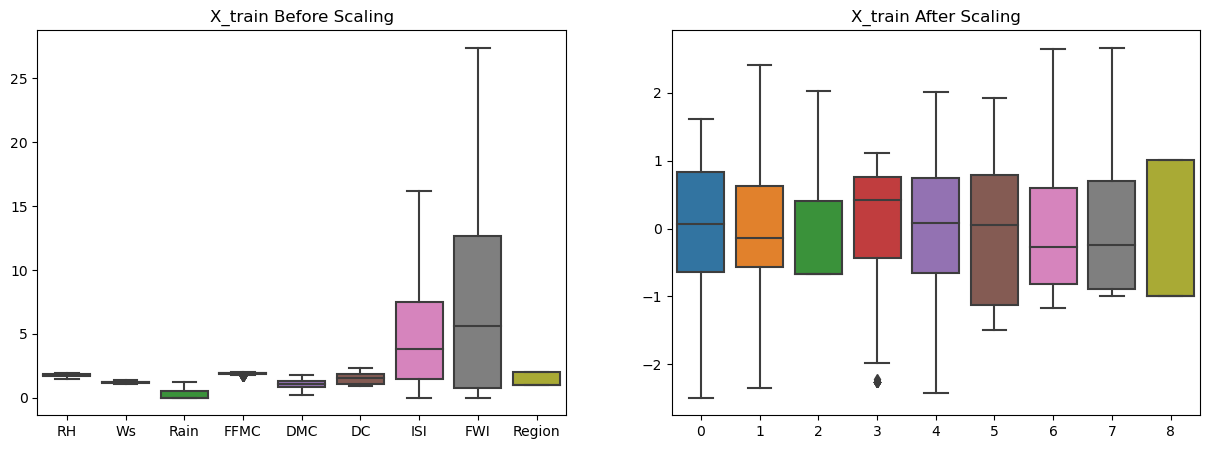

In [15]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

In [16]:
X_train.to_csv('Algerian_forest_fires_batchR.csv', index=False)

# Model Selection For Regression

- **Model selection process**
- **Fine tune and Finalize the model**

# Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


lreg = LinearRegression()
lreg.fit(X_train_scaled, y_train)
lreg_pred = lreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, lreg_pred)
r2 = r2_score(y_test, lreg_pred)

print("Linear Regression")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Linear Regression
R2 Score value: 0.6573
MAE value: 1.8778


# Lasso Regression

In [18]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score


lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, lasso_pred)
r2 = r2_score(y_test, lasso_pred)


print("Lasso Regression")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Lasso Regression
R2 Score value: 0.4245
MAE value: 2.4548


# Ridge Regression

In [19]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, ridge_pred)
r2 = r2_score(y_test, ridge_pred)


print("Ridge Regression")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Ridge Regression
R2 Score value: 0.6568
MAE value: 1.8799


# Support Vector Regressor

In [20]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

svr = SVR()
svr.fit(X_train_scaled, y_train)
svr_pred = svr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, svr_pred)
r2 = r2_score(y_test, svr_pred)


print("Support Vector Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Support Vector Regressor
R2 Score value: 0.5818
MAE value: 1.8862


# Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
mae = mean_absolute_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)


print("Random Forest Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Regressor
R2 Score value: 0.6461
MAE value: 1.8410


# K-Nearest-Neighbors Regressor

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
mae = mean_absolute_error(y_test, knn_pred)
r2 = r2_score(y_test, knn_pred)


print("K_Neighbours Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

K_Neighbours Regressor
R2 Score value: 0.5823
MAE value: 1.9410


# Accuracy Score Summary

|     Models              | Accuracy score | 
|:-----------------------:|:--------------:|
|Linear Regression      |  65.73%       |  
|Ridge Regression       |  65.68%        |  
|Random Forest Regressor|  64.61%      |
|K_Neighbours Regressor|58.23%|
|Lasso Regression|42.45%|
|Support Vector Regressor|58.18%|
 


# Hyperparameter tuning

In [23]:
param_grid =[{'bootstrap': [True, False],
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,120],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 3, 4],
'min_samples_split': [2, 6, 10],
'n_estimators': [5, 20, 50, 100]}]

f_reg = RandomForestRegressor()
Random_rf = RandomizedSearchCV(f_reg,param_grid, cv = 10, verbose=2,n_jobs = -1)
Random_rf.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 110,
                                                       120],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 3, 4],
                                         'min_samples_split': [2, 6, 10],
                                         'n_estimators': [5, 20, 50, 100]}],
                   verbose=2)

In [24]:
best_random_grid=Random_rf.best_estimator_

bestrf_pred = best_random_grid.predict(X_test_scaled)
mae = mean_absolute_error(y_test, bestrf_pred)
r2 = r2_score(y_test, bestrf_pred)


print("Random Forest Tuned")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Tuned
R2 Score value: 0.6670
MAE value: 1.7356


In [25]:
from sklearn.exceptions import FitFailedWarning, ConvergenceWarning
import warnings 
warnings.filterwarnings(action= 'ignore')
ridge_params = [{'alpha': (np.logspace(-11, 11, 100)), 
                'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}] 

ridge = Ridge()
random_ridge = RandomizedSearchCV(ridge, ridge_params, cv=10, n_jobs= -1)
random_ridge.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
                   param_distributions=[{'alpha': array([1.00000000e-11, 1.66810054e-11, 2.78255940e-11, 4.64158883e-11,
       7.74263683e-11, 1.29154967e-10, 2.15443469e-10, 3.59381366e-10,
       5.99484250e-10, 1.00000000e-09, 1.66810054e-09, 2.78255940e-09,
       4.64158883e-09, 7.74263683e-09, 1.29154967e-08, 2.15443469e-08,
       3.59381366e-08, 5.994...
       5.99484250e+06, 1.00000000e+07, 1.66810054e+07, 2.78255940e+07,
       4.64158883e+07, 7.74263683e+07, 1.29154967e+08, 2.15443469e+08,
       3.59381366e+08, 5.99484250e+08, 1.00000000e+09, 1.66810054e+09,
       2.78255940e+09, 4.64158883e+09, 7.74263683e+09, 1.29154967e+10,
       2.15443469e+10, 3.59381366e+10, 5.99484250e+10, 1.00000000e+11]),
                                         'solver': ['auto', 'svd', 'cholesky',
                                                    'lsqr', 'sparse_cg', 'sag',
                                                    'saga', 'lbfgs']}])

In [26]:
best_ridge = random_ridge.best_estimator_

rbest_pred = best_ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, rbest_pred)
r2 = r2_score(y_test, rbest_pred)


print("Ridge Regressor Tuned")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Ridge Regressor Tuned
R2 Score value: 0.6380
MAE value: 1.9327


# Pickling the file

In [27]:
import pickle 
pickle.dump(best_random_grid, open('R_model.pkl','wb'))

# Testing pickle file 

In [28]:
#testing pickle file 
test_pickle = pickle.load(open('R_model.pkl','rb'))
bestrf_tpred = test_pickle.predict(X_test_scaled)
r2 = r2_score(y_test, bestrf_tpred)
r2

0.6669697254271235

In [29]:
dict_test = {"RH":1.763427994,
"Ws":1.278753601,
"Rain":0,
"FFMC":1.824125834,
"DMC":0.643452676,
"DC":0.934498451,
"ISI":1.3,
"FWI":0.5,
"Region":1
}

In [30]:
apps= [list(dict_test.values())]

In [31]:
test_pickle.predict(apps)

array([34.08907143])